# HONR 39900 Fall 2021: Foundations of Geospatial Analytics
## Week 3 Class Notebook
## Creating Maps via Python

### Justin A. Gould (gould29@purdue.edu)

# Required Packages

In [66]:
from IPython.display import display
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load Data

We will be using two (2) files to create a lap of London, England:
 - **London_Borough_Excluding_MHW.shp**
   - A [shapefile](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/shapefiles/what-is-a-shapefile.htm) is geospatial vector data format for geographic information system (GIS) software. It is developed and regulated by Esri (makers of ArcGIS software) as a mostly open specification for data interoperability among Esri and other GIS software products. The shapefile format can spatially describe vector features: points, lines, and polygons, representing, for example, water wells, rivers, and lakes.
   - This is the file which has the geographic boundaries of London and its boroughs.
 - **london-borough-profiles.csv**
   - A spreadsheet containing many features about a given borough. For example: Population, Households (census), Demographics, Migrant population, Ethnicity, Language, Employment, etc.

In [4]:
shapefile = "./ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(shapefile)

Let's look at the first few rows of the shapefile. It looks like a Pandas DataFrame; however, it is actually a `geopandas.geodataframe.GeoDataFrame`!

Look at the columns:
- `NAME`: Name of borough
- `GSS_CODE`: Geographic Security System (GSS) is a project of NORC at the University of Chicago, with principal funding from the National Science Foundation. Since 1972, the GSS has been monitoring societal change and studying the growing complexity of American society. This is an identifier for the borough.
- `HECTARES`: A unit of area equal to 10,000 square meters
- `geometry`: A polygon representing the bounding box of a borough. Nice! This is what we will map.
  - Note the numbers, though. They look strange. What is going on?

# Explore the Data

In [14]:
display(map_df.head())
print("\n", "Type:", type(map_df))

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."



 Type: <class 'geopandas.geodataframe.GeoDataFrame'>


In [20]:
map_df["geometry"].head()

0    POLYGON ((516401.600 160201.800, 516407.300 16...
1    POLYGON ((535009.200 159504.700, 535005.500 15...
2    POLYGON ((540373.600 157530.400, 540361.200 15...
3    POLYGON ((521975.800 178100.000, 521967.700 17...
4    POLYGON ((510253.500 182881.600, 510249.900 18...
Name: geometry, dtype: geometry

# Preprocess Data and JOIN Attributes

The coordinates we see in the table are not in the right Coordinate Reference System (CRS). A spatial reference system defines a specific map projection--how to "flatten" the Earth on a map--as well as transformations between different spatial reference systems. There are thousands of CRSs, available here: https://epsg.io/.

It turns out the default CRS for our data is non-standard. Let's transform our CRS into one with which we are more comfortable: EPSG 4326. We can do this via `geopandas`'s `to_crs` function.

In [23]:
#Convert CRS to EPSG 4326
map_df = map_df.to_crs(epsg=4326)
map_df["geometry"].head()

0    POLYGON ((-0.33068 51.32901, -0.33059 51.32909...
1    POLYGON ((-0.06402 51.31864, -0.06408 51.31861...
2    POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...
3    POLYGON ((-0.24456 51.48870, -0.24468 51.48868...
4    POLYGON ((-0.41183 51.53408, -0.41188 51.53412...
Name: geometry, dtype: geometry

Let's see what the map looks like now.

<AxesSubplot:>

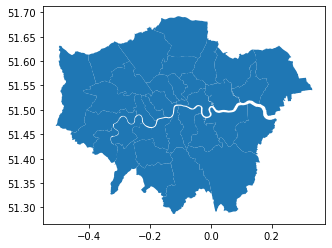

In [27]:
map_df.plot()

This is cool, but it doesn't tell us anything. As we know from our dive into map design principles, maps need to provide value! Let's explore some of the attributes in the CSV to see what might be interesting to plot.

In [62]:
df = pd.read_csv("./london-borough-profiles.csv")
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


Wow, that's a lot of data. 84 columns is a bit intimidating (and unreasonable). Let's start with just a few columns to create a couple maps.

In [63]:
df = df[["Code",
         "Area_name",
         "Happiness_score_2011-14_(out_of_10)", 
         "Population_density_(per_hectare)_2017", 
         "Mortality_rate_from_causes_considered_preventable_2012/14",
         "People_aged_17+_with_diabetes_(%)"
        ]]

In [64]:
#Very ugly column names...let's rename them
data_for_map = df.rename(index=str, columns={
    "Happiness_score_2011-14_(out_of_10)"                       : "happiness",
    "Population_density_(per_hectare)_2017"                     : "pop_density_per_hectare",
    "Mortality_rate_from_causes_considered_preventable_2012/14" : "mortality",
    "People_aged_17+_with_diabetes_(%)"                         : "diabetes",
    "Area_name"                                                 : "borough"
})

data_for_map.head()

,Code,borough,happiness,pop_density_per_hectare,mortality,diabetes
0,E09000001,City of London,6.0,30.3,129,2.6
1,E09000002,Barking and Dagenham,7.1,57.9,228,7.3
2,E09000003,Barnet,7.4,44.9,134,6.0
3,E09000004,Bexley,7.2,40.3,164,6.9
4,E09000005,Brent,7.2,76.8,169,7.9


We now need to `JOIN` our two datasets. We can do this via SQL; however, `pandas` has a built-in function for this: `pd.join()`. See how handy the GSS Code is? That is our unique identifier for the boroughs.

In [65]:
merged = map_df.set_index("GSS_CODE").join(data_for_map.set_index("Code"))

merged.head()

,NAME,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,borough,happiness,pop_density_per_hectare,mortality,diabetes
GSS_CODE,,,,,,,,,,,,
E09000021,Kingston upon Thames,3726.117,0.000,F,None,None,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909...",Kingston upon Thames,7.4,47.1,141,4.9
E09000008,Croydon,8649.441,0.000,F,None,None,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861...",Croydon,7.2,44.7,178,6.5
E09000006,Bromley,15013.487,0.000,F,None,None,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ...",Bromley,7.4,21.8,148,5.2
E09000018,Hounslow,5658.541,60.755,F,None,None,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868...",Hounslow,7.4,49,166,6.5
E09000009,Ealing,5554.428,0.000,F,None,None,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412...",Ealing,7.3,63.3,164,6.9


Success! We can now plot attributes on our map!

# Visualize our Map

We will use a `choropleth` via `matplotlib` to visualize our map.
  - `choropleth`: From our friends at Wikipedia..."A choropleth map is a type of thematic map in which a set of pre-defined areas is colored or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income."

<AxesSubplot:>

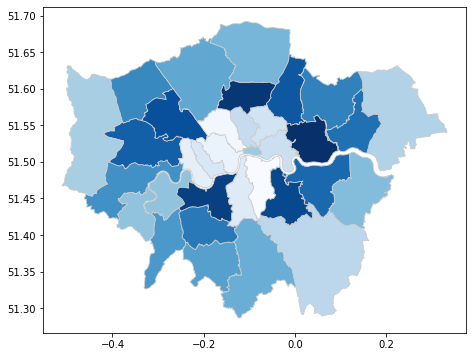

In [122]:
#Specify which feature to show on the map
feature = "pop_density_per_hectare"

#Set the range for the choropleth
vmin, vmax = 120, 220

#Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

#Create map
merged.plot(column=feature, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8")

Wow, we have our basic map. Exciting! Not very pretty, though. Let's employ some of the map design principles we just learned.

# Beautify our Map

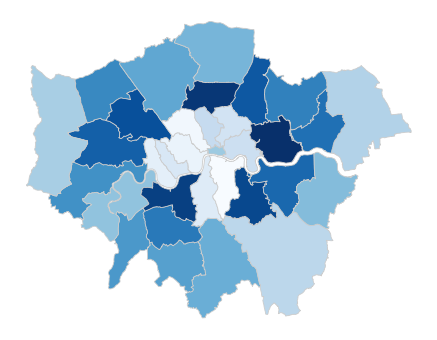

In [123]:
#Remove the axis
ax.axis("off")
fig

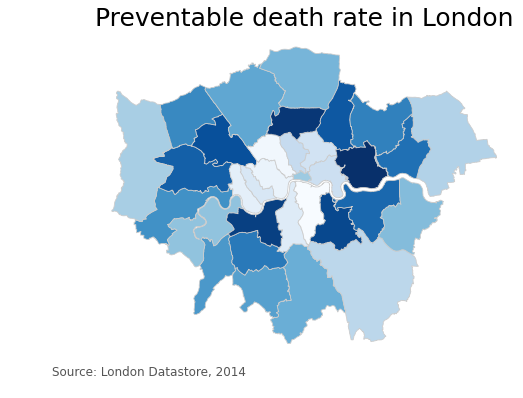

In [124]:
#Add a title
ax.set_title("Preventable death rate in London", fontdict={"fontsize": "25", "fontweight" : "3"})

#Create an annotation for the data source
ax.annotate("Source: London Datastore, 2014", 
            xy=(0.1, .08), 
            xycoords="figure fraction", 
            horizontalalignment="left", 
            verticalalignment="top", 
            fontsize=12, 
            color="#555555")

#I use the dark theme, so I will set my background to white
fig.set_facecolor("white")

fig

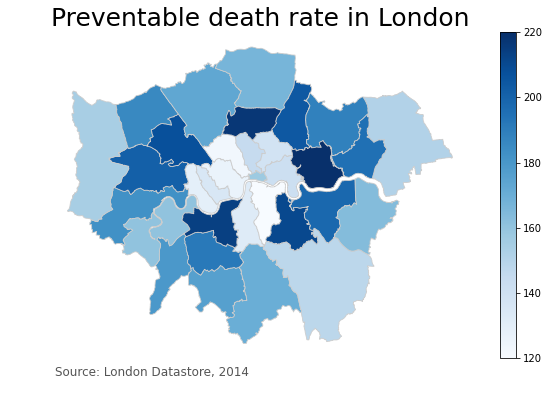

In [126]:
#Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Empty array for the data range
sm._A = []

#Add the colorbar to the figure
cbar = fig.colorbar(sm)

fig

# Save Data for QGIS

This will save us time. Please save the `merged` DataFrame as a CSV to disk.

In [127]:
merged.to_csv("./merged.csv", index=False)